In [16]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
from matplotlib import rcParams

In [2]:
URL = "https://api.fda.gov/drug/event.json?count=patient.reaction.reactionmeddrapt.exact"
data = requests.get(URL).json()
rxn_counts = pd.DataFrame(data.get("results"))
rxn_counts.shape

(100, 2)

In [3]:
rxn_counts.head(2)

,term,count
0,DRUG INEFFECTIVE,733191
1,NAUSEA,485098


In [4]:
#get all country counts 
URL = "https://api.fda.gov/drug/event.json?count=occurcountry.exact"
data = requests.get(URL).json()
country = pd.DataFrame(data.get("results"))
country.shape

(100, 2)

In [5]:
# list of reactions
rxns = []
for i in rxn_counts.term:
    rxns.append(i.replace(" ", "+"))

# create list of URLS to get reaction counts for all countries
URL = "https://api.fda.gov/drug/event.json?search=patient.reaction.reactionmeddrapt:XXX&count=occurcountry.exact"
URL_x=[]
for i in rxns:
    URL_x.append(URL.replace("XXX", i))

# download data and store in dataframe
df_append = []
for url in URL_x:
    data = requests.get(url).json()
    df = pd.DataFrame(data.get("results"))
    df.set_index("term", drop=True, inplace=True)
    df_append.append(df)


In [6]:
# concatenate all diseases by country

final_df = pd.concat(df_append, axis = 1)
final_df.columns = rxns
final_df.shape

/home/pcuser/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


(176, 100)

In [7]:
final_df.head()

,DRUG+INEFFECTIVE,NAUSEA,DEATH,FATIGUE,HEADACHE,DIARRHOEA,DYSPNOEA,PAIN,OFF+LABEL+USE,DIZZINESS,...,NEUTROPENIA,THROMBOCYTOPENIA,GASTROINTESTINAL+HAEMORRHAGE,SYNCOPE,VISUAL+IMPAIRMENT,DRY+SKIN,INFLUENZA,HAEMORRHAGE,ABDOMINAL+DISTENSION,PRODUCT+DOSE+OMISSION
AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AE,116.0,45.0,85.0,49.0,41.0,30.0,52.0,162.0,1458.0,39.0,...,20.0,16.0,69.0,16.0,22.0,42.0,26.0,55.0,54.0,172.0
AF,NaN,5.0,NaN,3.0,NaN,5.0,NaN,16.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0
AI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL,22.0,NaN,NaN,3.0,NaN,NaN,11.0,12.0,NaN,NaN,...,NaN,NaN,NaN,2.0,6.0,8.0,NaN,NaN,NaN,NaN


In [39]:
final_df.columns.tolist()

['DRUG+INEFFECTIVE',
 'NAUSEA',
 'DEATH',
 'FATIGUE',
 'HEADACHE',
 'DIARRHOEA',
 'DYSPNOEA',
 'PAIN',
 'OFF+LABEL+USE',
 'DIZZINESS',
 'MALAISE',
 'VOMITING',
 'RASH',
 'ASTHENIA',
 'ARTHRALGIA',
 'PYREXIA',
 'FALL',
 'PRURITUS',
 'PNEUMONIA',
 'PAIN+IN+EXTREMITY',
 'ANXIETY',
 'INSOMNIA',
 'INJECTION+SITE+PAIN',
 'DRUG+DOSE+OMISSION',
 'WEIGHT+DECREASED',
 'FEELING+ABNORMAL',
 'DEPRESSION',
 'COUGH',
 'BACK+PAIN',
 'ABDOMINAL+PAIN',
 'MYOCARDIAL+INFARCTION',
 'CONDITION+AGGRAVATED',
 'WEIGHT+INCREASED',
 'DECREASED+APPETITE',
 'BLOOD+GLUCOSE+INCREASED',
 'HYPERTENSION',
 'CHEST+PAIN',
 'SOMNOLENCE',
 'DRUG+HYPERSENSITIVITY',
 'ERYTHEMA',
 'HYPOTENSION',
 'ANAEMIA',
 'ABDOMINAL+PAIN+UPPER',
 'ALOPECIA',
 'GAIT+DISTURBANCE',
 'CEREBROVASCULAR+ACCIDENT',
 'CONSTIPATION',
 'MUSCLE+SPASMS',
 'MYALGIA',
 'TREMOR',
 'HYPERSENSITIVITY',
 'NASOPHARYNGITIS',
 'PRODUCT+QUALITY+ISSUE',
 'CONFUSIONAL+STATE',
 'PARAESTHESIA',
 'OVERDOSE',
 'DRUG+INTERACTION',
 'URTICARIA',
 'URINARY+TRACT+INFECTIO

In [8]:
final_df.to_csv("eda_data.csv")

In [46]:
x = (final_df.isnull().sum(axis=0)/final_df.shape[0])


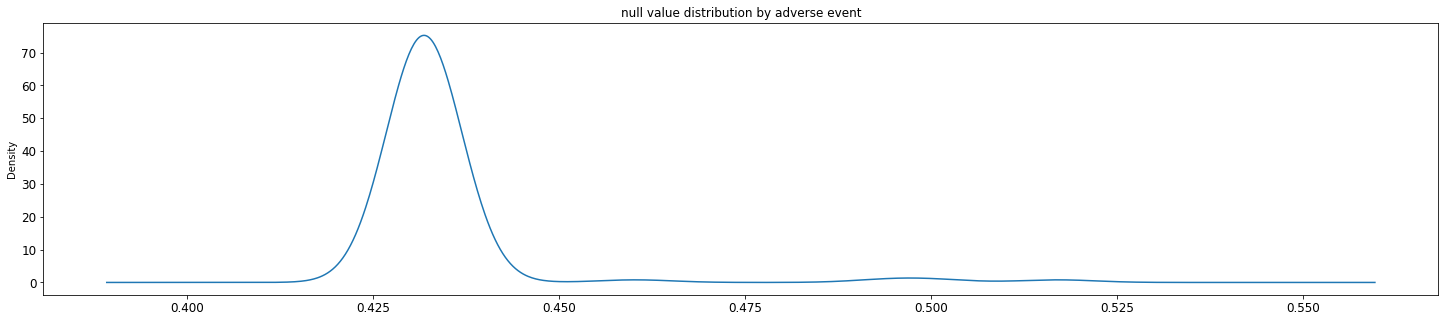

In [40]:
x = (final_df.isnull().sum(axis=0)/final_df.shape[0])
x.plot(kind= "kde", figsize = (25,5), fontsize = 12)
plt.title("null value distribution by adverse event")
plt.show()

In [9]:
url = " https://api.fda.gov/drug/label.json?count=openfda.product_type.exact"
datas = requests.get(url).json()
product = pd.DataFrame(data.get("results"))

In [10]:
product.head()

,term,count
0,US,1127301
1,CA,49933
2,GB,45860
3,DE,35506
4,JP,27504


In [20]:
import plotly.express as px
fig = px.bar(product, x='term', y='count',color='count')
fig.show()

In [22]:
dummy = """https://api.fda.gov/drug/event.json?search=patient.drug.openfda.pharm_class_epc:"nonsteroidal+anti-inflammatory+drug"&limit=1"""
dataas = requests.get(dummy).json()

In [24]:
temp = dataas.get('results')

In [38]:
temp[0]

{'reporttype': '2',
 'safetyreportversion': '4',
 'receivedateformat': '102',
 'primarysource': {'qualification': '5', 'reportercountry': 'PL'},
 'transmissiondateformat': '102',
 'fulfillexpeditecriteria': '1',
 'safetyreportid': '10012172',
 'patient': {'patientonsetage': None,
  'summary': {'narrativeincludeclinical': 'CASE EVENT DATE: 20140215'},
  'reaction': [{'reactionoutcome': '1',
    'reactionmeddraversionpt': '18.0',
    'reactionmeddrapt': 'Cerebrovascular accident'},
   {'reactionoutcome': '6',
    'reactionmeddraversionpt': '18.0',
    'reactionmeddrapt': 'Monoparesis'}],
  'patientonsetageunit': '801',
  'patientsex': '1',
  'drug': [{'drugstartdateformat': '102',
    'drugindication': 'GASTROOESOPHAGEAL CANCER',
    'activesubstance': {'activesubstancename': 'OXALIPLATIN'},
    'drugcharacterization': '1',
    'drugstartdate': '20140123',
    'openfda': {'product_ndc': ['47335-176',
      '57277-001',
      '0781-9315',
      '0781-9317',
      '0955-1733',
      '47335

In [31]:
len(temp)

1

In [49]:
te = """https://api.fda.gov/drug/event.json?search=patiten:"drug"&limit=1"""
patient = requests.get(te).json()

In [50]:
patient

{'error': {'code': 'NOT_FOUND', 'message': 'No matches found!'}}

In [ ]:
temp = dataas.get('results')

In [51]:
pat_drug = """https://api.fda.gov/drug/event.json?search=receivedate:[20040101+TO+20200605]&count=patient.drug.actiondrug"""

In [52]:
patient_drug = requests.get(pat_drug).json()

In [55]:
pat_drug_results = dataas.get('results')

In [63]:
de = pat_drug_results[0]
de

{'reporttype': '2',
 'safetyreportversion': '4',
 'receivedateformat': '102',
 'primarysource': {'qualification': '5', 'reportercountry': 'PL'},
 'transmissiondateformat': '102',
 'fulfillexpeditecriteria': '1',
 'safetyreportid': '10012172',
 'patient': {'patientonsetage': None,
  'summary': {'narrativeincludeclinical': 'CASE EVENT DATE: 20140215'},
  'reaction': [{'reactionoutcome': '1',
    'reactionmeddraversionpt': '18.0',
    'reactionmeddrapt': 'Cerebrovascular accident'},
   {'reactionoutcome': '6',
    'reactionmeddraversionpt': '18.0',
    'reactionmeddrapt': 'Monoparesis'}],
  'patientonsetageunit': '801',
  'patientsex': '1',
  'drug': [{'drugstartdateformat': '102',
    'drugindication': 'GASTROOESOPHAGEAL CANCER',
    'activesubstance': {'activesubstancename': 'OXALIPLATIN'},
    'drugcharacterization': '1',
    'drugstartdate': '20140123',
    'openfda': {'product_ndc': ['47335-176',
      '57277-001',
      '0781-9315',
      '0781-9317',
      '0955-1733',
      '47335

In [60]:
for key,value in de.items():
    print(key)

reporttype
safetyreportversion
receivedateformat
primarysource
transmissiondateformat
fulfillexpeditecriteria
safetyreportid
patient
serious
reportduplicate
receiptdate
receiptdateformat
receiver
companynumb
occurcountry
duplicate
sender
receivedate
seriousnesshospitalization
transmissiondate
primarysourcecountry


In [65]:
print(de["serious"])

1


In [68]:
dae = """https://api.fda.gov/drug/event.json?search=receivedate:[20040101+TO+20200605]&count=patient.patientsex"""
pat_count = requests.get(dae).json()
pat_count = pd.DataFrame(pat_count.get('results'))

In [71]:
pat_count

,term,count
0,2,6576340
1,1,4113009
2,0,92807


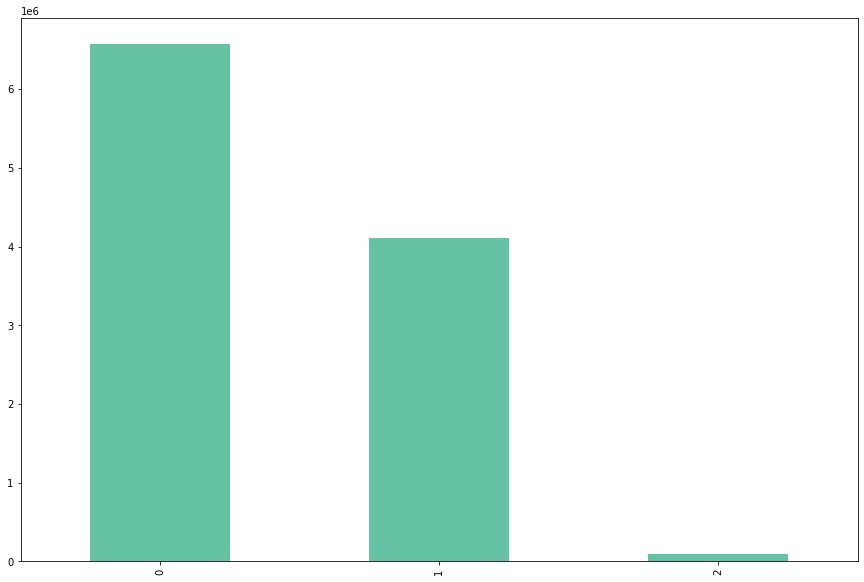

In [89]:
pat_count["count"].plot(x=pat_count["term"],kind="bar",colormap="Set2")